In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import astropy.units as u
from obs_prep import obs_plan as op
import numpy as np


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


### Target field
Propose an area covering RA range from $-25.5^\circ$ to $16.5^\circ$, Dec range from $-5.2^\circ$ to $6.8^\circ$.\
Covering WiggleZ 0hr and 1hr fields.\
Split the total RA into two sub-ranges, i.e. $[-25.5^\circ, -4.5^\circ]$ and 
$[-4.5^\circ, 16.5^\circ]$.\
Each sub-range can be well covered with $90$ min observation. 

In [4]:
# setup the survey patch 
# patch = op.SkyField(ra_min, ra_max, dec_min, dec_max, 'Name')

#patch = op.SkyField(157.0, 168.0, -1.0, 8.0, 'WiggleZ11hr')
patch0hr = op.SkyField(-9.9, -0.9, -13.4, 1.8, 'WiggleZ0hr')
patch1hr = op.SkyField(7.5, 16.5, -3.7, 5.3, 'WiggleZ1hr')


#patch = op.SkyField(-25.5, 16.5, -5.2, 6.8, 'WiggleZ1hrExt')
patch1 = op.SkyField(-25.5, -4.5, -5.2, 6.8, 'WiggleZ1hrExt1')
patch2 = op.SkyField(-4.5,   16.5, -5.2, 6.8, 'WiggleZ1hrExt2')

# setup the calibrator template
# cal = op.Calibrator('05h19m49.69s', '-45d46m44.5s', flux, 'PicA', 20)

PicA = op.Calibrator('05h19m49.69s', '-45d46m44.5s', 60, 'PicA', 20)
PKS0408_65 = op.Calibrator("04h08m20.37884s", "-65d45m09.0806s", 20, 'PKS0408-65', 20)
C3C273 = op.Calibrator("12h29m06.41s", "+02d03m05.1s",   50, '3C273', 20)

In [6]:
obs_sche = op.MeerKATHRD()
obs_sche.obs_date = [
                     '2022-07-20 6:00:00',
                     '2022-09-21 6:00:00',
                     #'2022-11-22 6:00:00',
                     ]
obs_sche.target_field = [patch1, patch2]
obs_sche.az_raster_range = [[ 22 * u.deg, 22 * u.deg, ],
                            [ 26 * u.deg, 26 * u.deg, ], 
                            [ 24 * u.deg, 24 * u.deg, ],
                           ]
obs_sche.obs_alt = [[40 * u.deg, 40. * u.deg], 
                    [45 * u.deg, 45. * u.deg], 
                    [42 * u.deg, 42. * u.deg], 
                   ]
obs_sche.block_time = [[90. * u.min, 90 * u.min],
                       [90. * u.min, 90 * u.min],
                       [90. * u.min, 90 * u.min]]
obs_sche.scaning_speed = [[8. * u.arcmin / u.second, 8. * u.arcmin / u.second],
                          [8. * u.arcmin / u.second, 8. * u.arcmin / u.second], 
                          [8. * u.arcmin / u.second, 8. * u.arcmin / u.second],
                         ]
obs_sche.dumping_rate = 2. * u.second
obs_sche.calibrator_list = [PicA, PicA, C3C273, C3C273]
obs_sche.get_schedule()
obs_sche.generate_altaz(shift=0.5)
obs_sche.make_obs()
display(obs_sche.obs_table[0])

Obs.,Calibrator,Scan Speed [arcmin/s],Total Time [s],AZ Range [deg],Scan Time (One-way) [s],Scan No. (Two-way) [#],Start Time [UTC],Start Time [LST],Pointing (AZ Alt)
Rising Block,PicA + PicA,8.0,5400.0,22.0,165.0,16,2022-07-20 22:11:08.409,19.526428,46.309049 40.004344
Setting Block,3C273 + 3C273,8.0,5400.0,22.0,165.0,16,2022-07-21 03:36:28.409,0.963496,-68.328439 39.988584
Rising Block,PicA + PicA,8.0,5400.0,26.0,195.0,14,2022-09-21 18:34:44.773,20.049719,37.355976 45.004533
Setting Block,3C273 + 3C273,8.0,5400.0,26.0,195.0,14,2022-09-21 23:03:28.409,0.540770,-63.375800 44.991893


### Scanning pattern 
The two sub-ranges are observed in different days.\
Plots below shows the scanning pattern with three different Alt angle.\
i.e. from top to bottom, El$=[40^\circ, 45^\circ]$.\
To covere the full Dec range, the corresponding Az range of different El are $[22^\circ, 26^\circ]$.

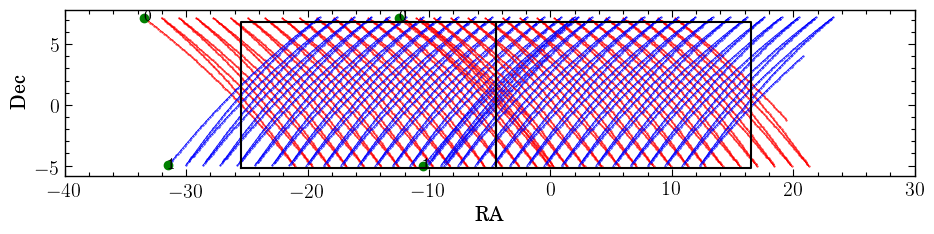

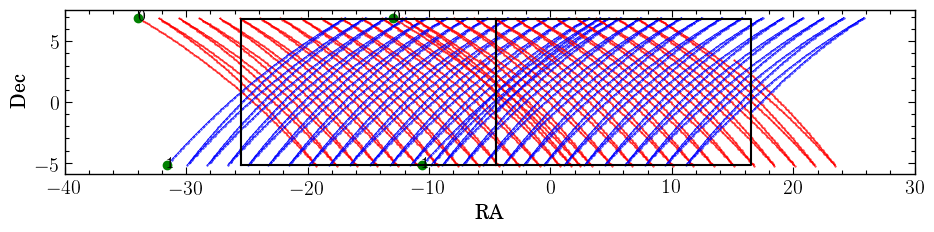

In [8]:
obs_sche.check_scans(project=False, day_select=[0, 1], zero_center=True, ra_range=[-40, 30])
obs_sche.check_scans(project=False, day_select=[1, 2], zero_center=True, ra_range=[-40, 30])

### The combined scanning pattern
Combining 9 days observation of 3 sub-ranges.\
Each sub-range is observed in 3 days with different Els\
Red for rising blocks and blue for setting blocks.\
green dots indicate the starting point of each scan. 

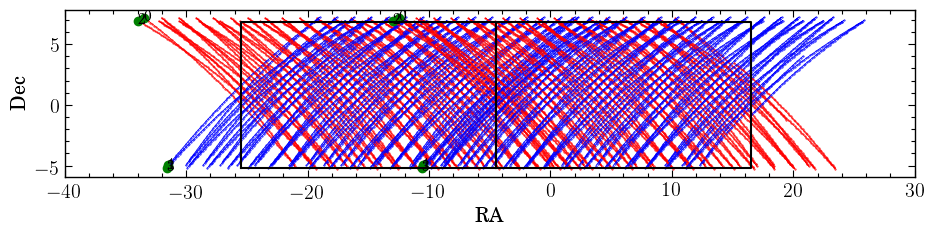

In [9]:
obs_sche.check_scans(project=False, zero_center=True, ra_range=[-40, 30])

### The hit map
The hitmap of the 9 days observation.\
red squares indicate the WiggleZ 0hr and 1hr fields

43200.0 s 38168.0 s


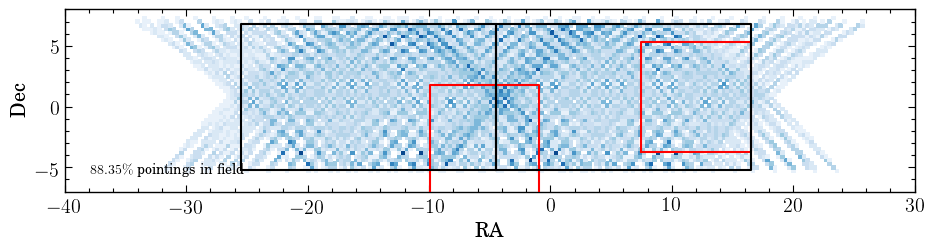

In [11]:
axes = patch0hr.check_field(c='r')
axes = patch1hr.check_field(axes=axes, c='r')
obs_sche.check_hitmap(axes=axes, zero_center=True, edges=[-40, 30, -7, 8])

### The available observation time windows

For WiggleZ Ext1 ( RA range $[-25.5^\circ, -4.5^\circ]$ ) available during Early July to Mid October;\
For WiggleZ Ext3 ( RA range $[ -4.5^\circ,  16.5^\circ]$ ) available during Early August to Mid November;

In [ ]:
obs_sche = op.MeerKATHRD()
obs_sche.obs_date = [
                     '2022-07-01 12:00:00', '2022-07-15 12:00:00',
                     '2022-08-01 12:00:00', '2022-08-15 12:00:00',
                     '2022-09-01 12:00:00', '2022-09-15 12:00:00',
                     '2022-10-01 12:00:00', '2022-10-15 12:00:00',
                     '2022-11-01 12:00:00', '2022-11-15 12:00:00',
                     ]
obs_sche.target_field = [patch1, patch2]
obs_sche.az_raster_range = [[ 22 * u.deg, 22 * u.deg, ], [ 22 * u.deg, 22 * u.deg, ],
                            [ 26 * u.deg, 26 * u.deg, ], [ 26 * u.deg, 26 * u.deg, ], 
                            [ 26 * u.deg, 26 * u.deg, ], [ 26 * u.deg, 26 * u.deg, ], 
                            [ 34 * u.deg, 34 * u.deg, ], [ 34 * u.deg, 34 * u.deg, ],
                            [ 34 * u.deg, 34 * u.deg, ], [ 34 * u.deg, 34 * u.deg, ],
                           ]
obs_sche.obs_alt = [[45 * u.deg, 45. * u.deg], [45 * u.deg, 45. * u.deg], 
                    [45 * u.deg, 45. * u.deg], [45 * u.deg, 45. * u.deg], 
                    [45 * u.deg, 45. * u.deg], [45 * u.deg, 45. * u.deg], 
                    [45 * u.deg, 45. * u.deg], [45 * u.deg, 45. * u.deg],
                    [45 * u.deg, 45. * u.deg], [45 * u.deg, 45. * u.deg],
                   ]
obs_sche.block_time = [[90. * u.min, 90 * u.min], [90. * u.min, 90 * u.min],
                       [90. * u.min, 90 * u.min], [90. * u.min, 90 * u.min],
                       [90. * u.min, 90 * u.min], [90. * u.min, 90 * u.min],
                       [90. * u.min, 90 * u.min], [90. * u.min, 90 * u.min],
                       [90. * u.min, 90 * u.min], [90. * u.min, 90 * u.min],
                      ]
obs_sche.scaning_speed = [
    [8. * u.arcmin / u.second, 8. * u.arcmin / u.second], [8. * u.arcmin / u.second, 8. * u.arcmin / u.second],
    [8. * u.arcmin / u.second, 8. * u.arcmin / u.second], [8. * u.arcmin / u.second, 8. * u.arcmin / u.second],
    [8. * u.arcmin / u.second, 8. * u.arcmin / u.second], [8. * u.arcmin / u.second, 8. * u.arcmin / u.second],
    [8. * u.arcmin / u.second, 8. * u.arcmin / u.second], [8. * u.arcmin / u.second, 8. * u.arcmin / u.second],
    [8. * u.arcmin / u.second, 8. * u.arcmin / u.second], [8. * u.arcmin / u.second, 8. * u.arcmin / u.second],
    ]
obs_sche.dumping_rate = 2. * u.second
obs_sche.calibrator_list = [PicA, PicA, C3C273, C3C273]
obs_sche.get_schedule()
obs_sche.generate_altaz(shift=0.5)
obs_sche.make_obs()
#display(obs_sche.obs_table[0])
obs_sche.check_schedule()

Sun rise time: 2022-07-02T05:36:48.990(UTC)
Sun set time: 2022-07-01T15:39:29.973(UTC)


Cal. PicA moon sep: 83.18-87.20 deg; sun sep 71.29-71.47 deg.
Cal. 3C273 moon sep: 48.34-60.35 deg; sun sep 85.59-86.54 deg.
----------
Sun rise time: 2022-07-16T05:34:04.438(UTC)
Sun set time: 2022-07-15T15:46:14.188(UTC)
Cal. PicA moon sep: 89.27-94.27 deg; sun sep 74.25-74.50 deg.
Cal. 3C273 moon sep: 131.61-146.07 deg; sun sep 72.30-73.24 deg.
----------
Sun rise time: 2022-08-02T05:24:26.825(UTC)
Sun set time: 2022-08-01T15:56:18.774(UTC)
Cal. PicA moon sep: 98.43-102.28 deg; sun sep 78.93-79.23 deg.
Cal. 3C273 moon sep:  1.93-14.51 deg; sun sep 56.12-57.07 deg.
----------
Sun rise time: 2022-08-16T05:12:00.576(UTC)
Sun set time: 2022-08-15T16:04:50.311(UTC)
Cal. PicA moon sep: 74.60-77.76 deg; sun sep 83.42-83.76 deg.
Cal. 3C273 moon sep: 164.05-176.68 deg; sun sep 42.78-43.73 deg.
----------
Sun rise time: 2022-09-02T04:53:00.763(UTC)
Sun set time: 2022-09-01T16:14:44.661(UTC)
Cal. PicA moon sep: 109.14-110.49 deg; sun sep 89.32-89.68 deg.
Cal. 3C273 moon sep: 34.78-48.45 deg; s

In [70]:
#obs_sche.check_satellite(reload=False, space=2)